In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn import svm

In [ ]:
import numpy as p

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5582 entries, 0 to 5581
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5582 non-null   object
 1   v2          5582 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 218.2+ KB


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.sample(5)

,v1,v2
1046,ham,Do 1 thing! Change that sentence into: \Becaus...
1072,spam,Dear U've been invited to XCHAT. This is our f...
1253,ham,Mum say we wan to go then go... Then she can s...
4547,ham,Hope you are having a good week. Just checking in
2654,ham,Its sarcasm.. .nt scarcasim


In [ ]:
df.rename(columns={'v1':'message_type','v2':'message'},inplace=True)

In [ ]:
df.sample(5)

,message_type,message
2856,ham,Today i'm not workin but not free oso... Gee.....
1087,ham,You can never do NOTHING
908,ham,WHITE FUDGE OREOS ARE IN STORES
5152,ham,Idk. I'm sitting here in a stop and shop parki...
994,ham,"I can't, I don't have her number!"


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
df['message_type']=encoder.fit_transform(df['message_type'])

In [ ]:
df['message_type'].sample(5)

1164    0
2090    0
1626    0
5080    0
1966    0
Name: message_type, dtype: int64

In [ ]:
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5572,1,"share OTP, PIN, CVV, Expiry Date, Debit/Credi..."
5575,1,Subject: 60 % off g eneric v * i * a * g * r *...
5577,1,Subject: whats the word . order your prescr - ...


In [ ]:
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['message_type'].value_counts()

0    4831
1     751
Name: message_type, dtype: int64

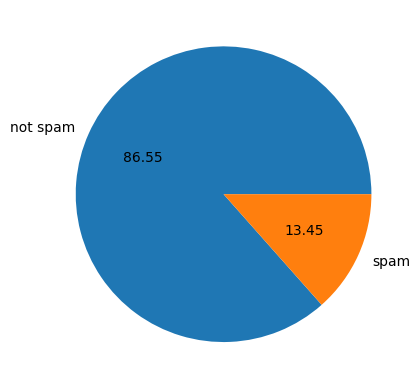

In [ ]:
plt.pie(df['message_type'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['message'].apply(len)

0        111
1         29
2        155
3         49
4         61
        ... 
5577     124
5578    3322
5579     142
5580     803
5581     142
Name: message, Length: 5582, dtype: int64

In [ ]:
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5577    [Subject, :, whats, the, word, ., order, your,...
5578    [Subject, :, proposed, rule, extends, marketin...
5579    [Subject, :, hpl, nom, for, july, 14, ,, 2000,...
5580    [Subject, :, toyota, fuel, guidelines, -, star...
5581    [Subject, :, hello, we, are, offering, 100, %,...
Name: message, Length: 5582, dtype: object

In [ ]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
4780,0,Yup... Hey then one day on fri we can ask miwa...,80,18
514,1,"You are guaranteed the latest Nokia Phone, a 4...",148,30
4070,0,I've reached home n i bathe liao... U can call...,56,15
284,0,Yeah I think my usual guy's still passed out f...,121,28
2432,0,Really dun bluff me leh... U sleep early too. ...,53,13


In [ ]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)


,message_type,message,num_characters,num_words,num_sentences
4518,0,Just got part Nottingham - 3 hrs 63miles. Good...,104,25,3
836,1,Do you want 750 anytime any network mins 150 t...,149,28,1
2033,0,IM GONNA MISS U SO MUCH,23,7,1
153,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
465,0,great princess! I love giving and receiving or...,148,37,5


In [ ]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4831.000000,4831.000000,4831.000000
mean,71.997723,17.451666,1.844339
std,75.869018,16.344242,1.481490
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,3322.000000,562.000000,38.000000


In [ ]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,751.000000,751.000000,751.000000
mean,140.541944,28.302264,3.039947
std,44.089945,10.570928,1.575987
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.500000,32.000000,4.000000
max,803.000000,196.000000,12.000000


In [ ]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='num_characters', ylabel='Count'>

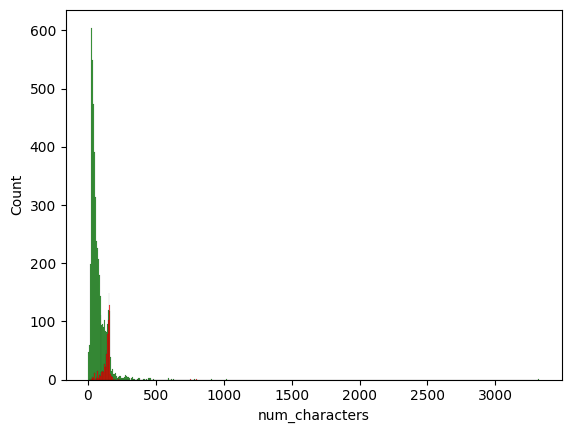

In [ ]:
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

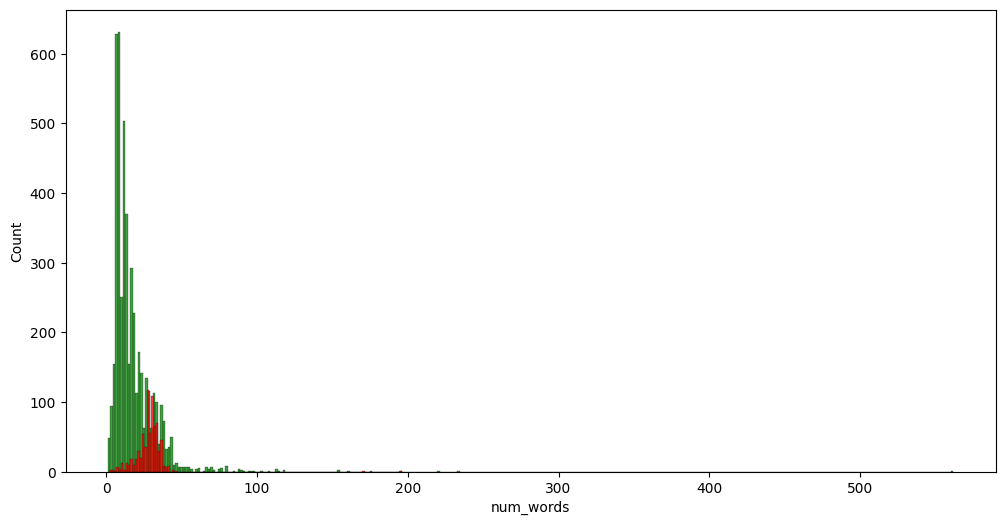

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')


<Axes: >

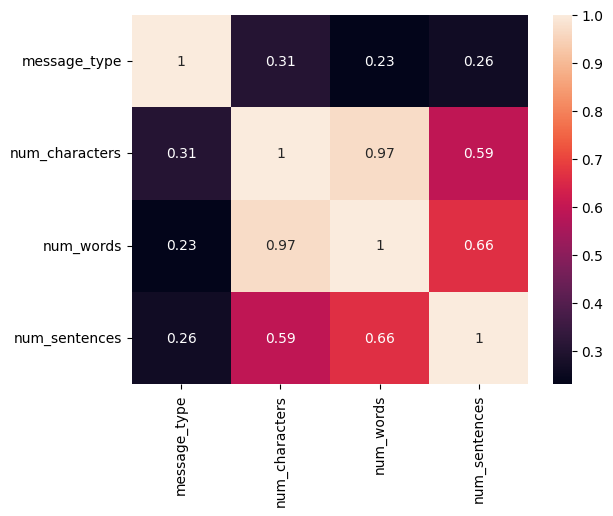

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
def text_transform(txt):
  txt=txt.lower()
  txt=nltk.word_tokenize(txt)

  y=[]
  for i in txt:
    if i.isalnum():
      y.append(i)
    y.clear()
  
  for i in txt:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  message=y[:]
  y.clear()

  for i in message :
    y.append(ps.stem(i))
  return " ".join(y)




In [ ]:
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  stopwords.words('english')
  len(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [ ]:
  import string
  string.punctuation



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
  from nltk.stem.porter import PorterStemmer
  ps =PorterStemmer()
  df['transformed_msg']=df['message'].apply(text_transform)
  df.sample(5)

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
5328,0,Sweet heart how are you?,24,6,1,sweet heart
1497,0,I'm putting it on now. It should be ready for ...,60,19,2,'m put readi lt time gt
2126,0,You do got a shitload of diamonds though,40,8,1,got shitload diamond though
4128,0,Me i'm not workin. Once i get job...,36,11,2,'m workin get job ...
5201,1,YOU VE WON! Your 4* Costa Del Sol Holiday or å...,164,35,4,4 costa del sol holiday å£5000 await collect c...


In [ ]:
from wordcloud import WordCloud 
wc=WordCloud(width=900,height=900,min_font_size=20,background_color="white")

In [ ]:
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

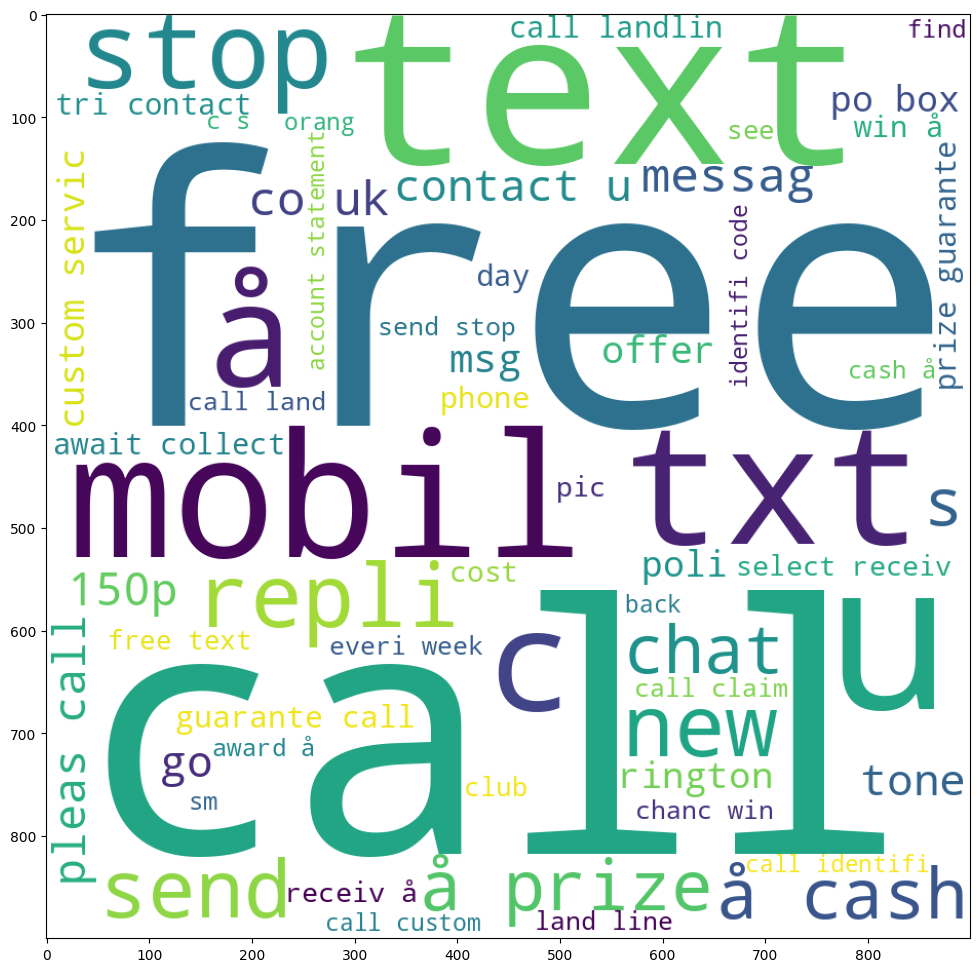

In [ ]:
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))

In [ ]:
plt.figure(figsize=(18,12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

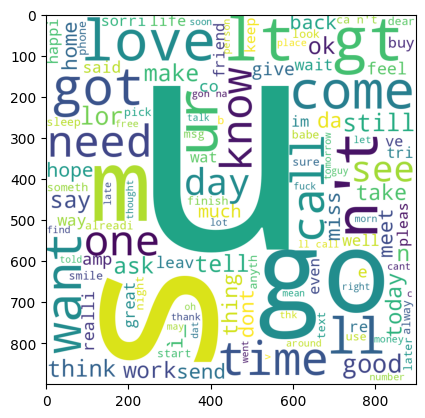

In [ ]:
plt.imshow(ham_wc)

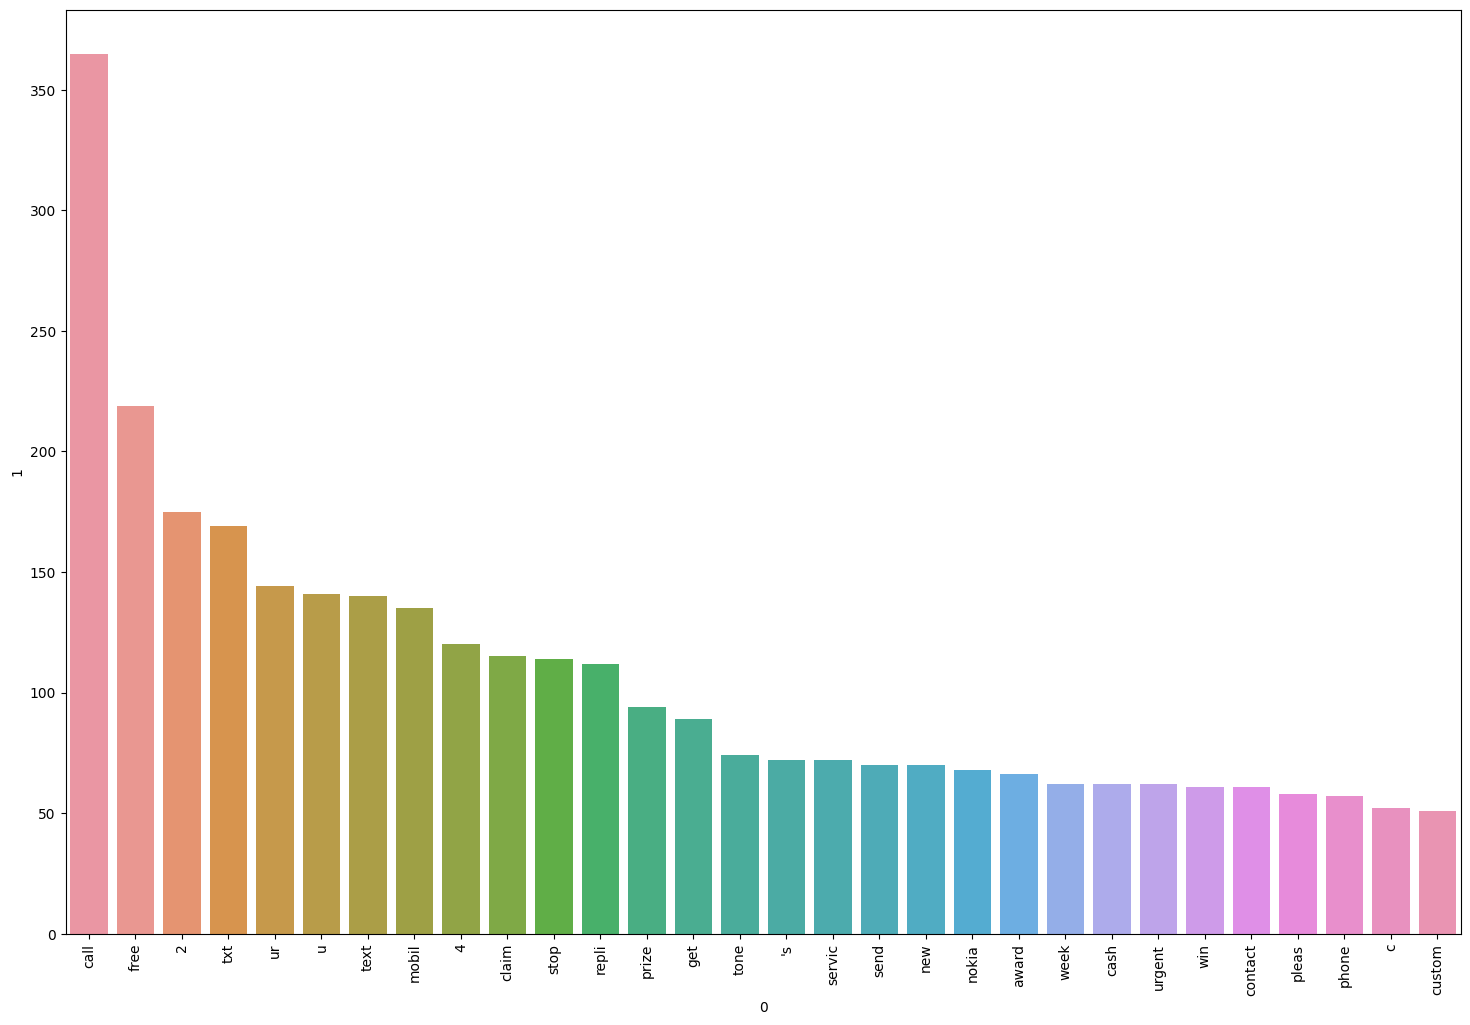

In [ ]:
sc=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
  for word in msg.split():
    sc.append(word)

from collections import Counter
Counter(sc)

Counter(sc).most_common(30)

plt.figure(figsize=(18,12))
sns.barplot(x=pd.DataFrame(Counter(sc).most_common(30))[0],y=pd.DataFrame(Counter(sc).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

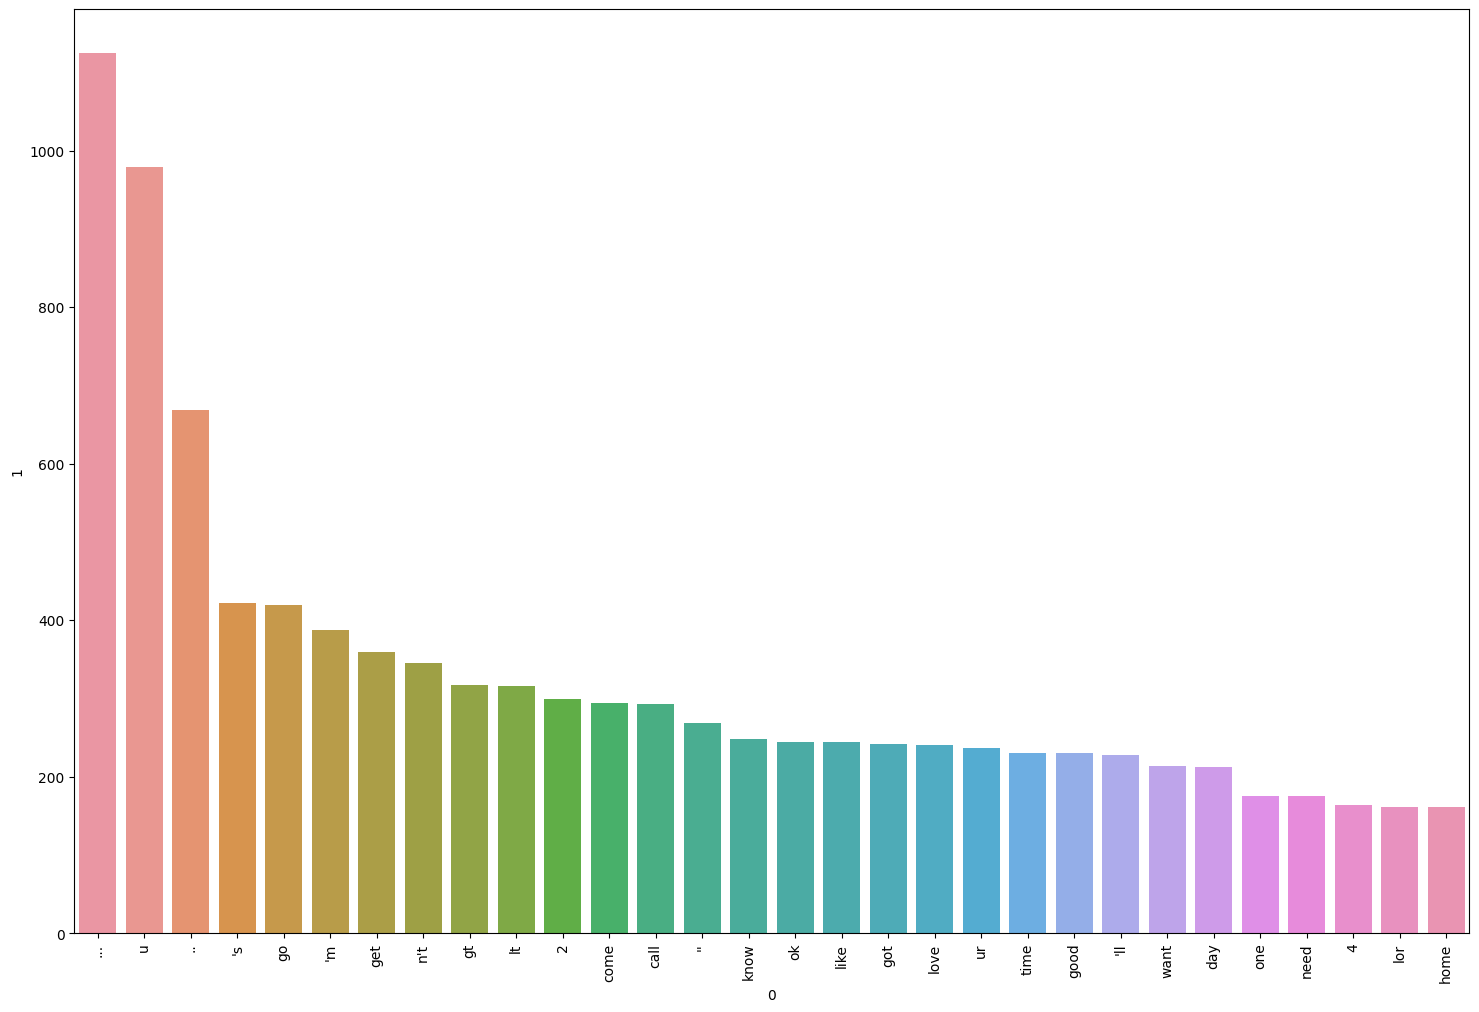

In [ ]:
hc = []
for msg in df[df['message_type']==0]['transformed_msg'].tolist():
  for word in msg.split():
    hc.append(word)

from collections import Counter
Counter(hc)

Counter(hc).most_common(30)

plt.figure(figsize=(18,12))
sns.barplot(x=pd.DataFrame(Counter(hc).most_common(30))[0],y=pd.DataFrame(Counter(hc).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# MODEL BUILDING

In [ ]:
from  sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['transformed_msg']).toarray()

In [ ]:
X.shape

(5582, 7532)

In [ ]:
y = df['message_type'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8701880035810206
[[851 128]
 [ 17 121]]
0.4859437751004016


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9776186213070726
[[966  13]
 [ 12 126]]
0.9064748201438849


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9767233661593554
[[975   4]
 [ 22 116]]
0.9666666666666667


In [ ]:
# tfidf --> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9301700984780662, 0.7238805970149254)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9301700984780662
Precision -  0.7238805970149254
For  KN
Accuracy -  0.9247985675917636
Precision -  1.0
For  NB
Accuracy -  0.9776186213070726
Precision -  0.9064748201438849
For  DT
Accuracy -  0.928379588182632
Precision -  0.9264705882352942
For  LR
Accuracy -  0.9794091316025068
Precision -  0.9831932773109243
For  RF
Accuracy -  0.973142345568487
Precision -  0.990909090909091
For  AdaBoost
Accuracy -  0.973142345568487
Precision -  0.9655172413793104
For  BgC
Accuracy -  0.9740376007162042
Precision -  0.943089430894309
For  ETC
Accuracy -  0.9785138764547896
Precision -  0.9830508474576272
For  GBDT
Accuracy -  0.9615040286481648
Precision -  0.9896907216494846
For  xgb
Accuracy -  0.9785138764547896
Precision -  0.9913793103448276


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.924799,1.000000
10,xgb,0.978514,0.991379
5,RF,0.973142,0.990909
9,GBDT,0.961504,0.989691
4,LR,0.979409,0.983193
8,ETC,0.978514,0.983051
6,AdaBoost,0.973142,0.965517
7,BgC,0.974038,0.943089
3,DT,0.928380,0.926471
2,NB,0.977619,0.906475


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.924799
1,xgb,Accuracy,0.978514
2,RF,Accuracy,0.973142
3,GBDT,Accuracy,0.961504
4,LR,Accuracy,0.979409
5,ETC,Accuracy,0.978514
6,AdaBoost,Accuracy,0.973142
7,BgC,Accuracy,0.974038
8,DT,Accuracy,0.928380
9,NB,Accuracy,0.977619


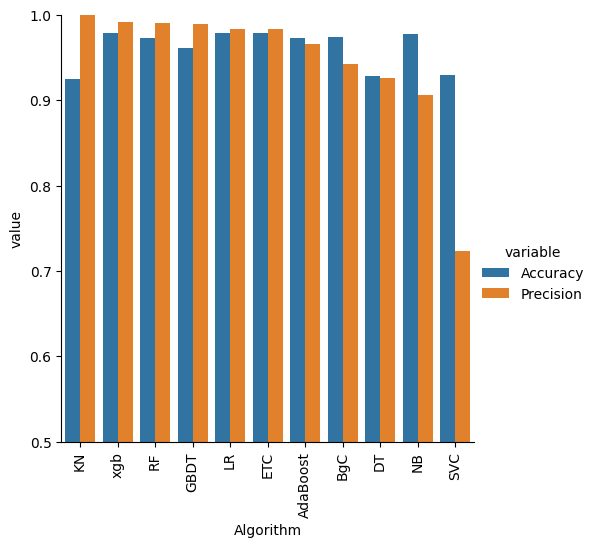

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.924799,1.000000,0.924799,1.000000,0.924799,1.000000,0.924799,1.000000
1,xgb,0.978514,0.991379,0.978514,0.991379,0.978514,0.991379,0.978514,0.991379
2,RF,0.973142,0.990909,0.973142,0.990909,0.973142,0.990909,0.973142,0.990909
3,GBDT,0.961504,0.989691,0.961504,0.989691,0.961504,0.989691,0.961504,0.989691
4,LR,0.979409,0.983193,0.979409,0.983193,0.979409,0.983193,0.979409,0.983193
5,ETC,0.978514,0.983051,0.978514,0.983051,0.978514,0.983051,0.978514,0.983051
6,AdaBoost,0.973142,0.965517,0.973142,0.965517,0.973142,0.965517,0.973142,0.965517
7,BgC,0.974038,0.943089,0.974038,0.943089,0.974038,0.943089,0.974038,0.943089
8,DT,0.928380,0.926471,0.928380,0.926471,0.928380,0.926471,0.928380,0.926471
9,NB,0.977619,0.906475,0.977619,0.906475,0.977619,0.906475,0.977619,0.906475


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9847806624888094
Precision 0.991869918699187


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9865711727842436
Precision 0.992


In [ ]:
def tokens(x):
  return x.split(',')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect= TfidfVectorizer( tokenizer=tokens ,use_idf=True, smooth_idf=True, sublinear_tf=False)

In [ ]:
import pickle
pickle.dump(tfidf_vect,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))